<a href="https://colab.research.google.com/github/IsaacMrSmile/Inmersion-en-DataSciencie/blob/main/EDA_grupal_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Y un tip:
sns.set_style("whitegrid")

# Para ver los estilos posibles en matplotlib:
#print(plt.style.available)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Kaushik-Varma/Marketing_Data_Analysis/master/Marketing_Analysis.csv",
                 skiprows = 2)

df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [ ]:
# Sacar "Job" y "Edu" por separado de la columna "jobedu":
df['job'] = df["jobedu"].apply(lambda x: x.split(",")[0])
df['education'] = df["jobedu"].apply(lambda x: x.split(",")[1])
# No se preocupen si no entienden esto, ya lo van a ver!

# Dropear "jobedu":
df.drop('jobedu', axis = 1, inplace = True)

In [ ]:
df.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [ ]:
df.shape

(45211, 20)

In [ ]:
df.describe()

,customerid,age,salary,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   targeted    45211 non-null  object 
 6   default     45211 non-null  object 
 7   housing     45211 non-null  object 
 8   loan        45211 non-null  object 
 9   contact     45211 non-null  object 
 10  day         45211 non-null  int64  
 11  month       45161 non-null  object 
 12  duration    45211 non-null  object 
 13  campaign    45211 non-null  int64  
 14  pdays       45211 non-null  int64  
 15  previous    45211 non-null  int64  
 16  poutcome    45211 non-null  object 
 17  response    45181 non-null  object 
 18  job         45211 non-null  object 
 19  education   45211 non-nul

In [ ]:
df.dtypes

customerid      int64
age           float64
salary          int64
balance         int64
marital        object
targeted       object
default        object
housing        object
loan           object
contact        object
day             int64
month          object
duration       object
campaign        int64
pdays           int64
previous        int64
poutcome       object
response       object
job            object
education      object
dtype: object

In [ ]:
df.isna().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
job            0
education      0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
print('Estado civil:')
df[['marital', 'response']].value_counts().sort_index()

Estado civil:


marital   response
divorced  no           4575
          yes           620
married   no          24403
          yes          2751
single    no          10854
          yes          1908
dtype: int64

In [ ]:
print('Educación:')
df[['education', 'response']].value_counts().sort_index()

Educación:


education  response
primary    no           6240
           yes           590
secondary  no          20715
           yes          2447
tertiary   no          11278
           yes          1990
unknown    no           1599
           yes           252
dtype: int64

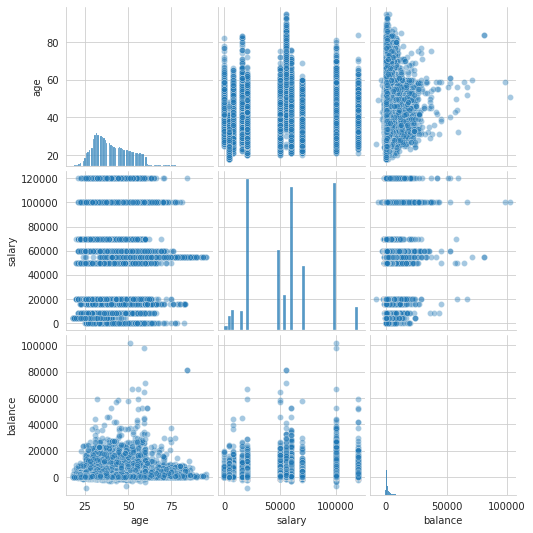

In [ ]:
sns.pairplot(data = df, vars = ['age', 'salary', 'balance'],
             plot_kws={'alpha':0.4})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Cantidad')

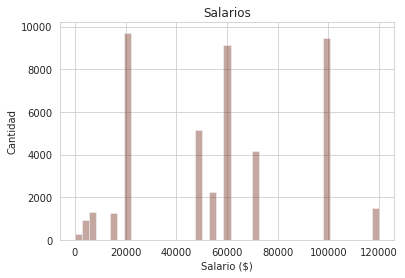

In [ ]:
sns.distplot(df["salary"], kde = False, color = '#6D2312')
plt.title('Salarios')
plt.xlabel('Salario ($)')
plt.ylabel('Cantidad')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Cantidad')

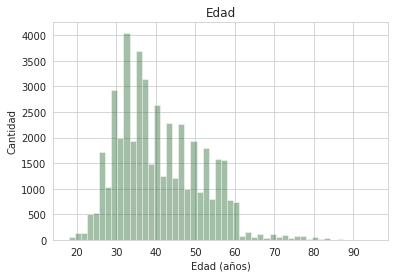

In [ ]:
sns.distplot(df["age"], kde = False, color = '#1D6025') 
plt.title('Edad')
plt.xlabel('Edad (años)')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

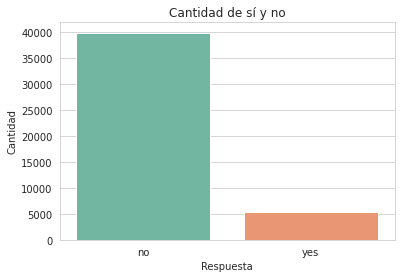

In [ ]:
sns.countplot(x = "response", data = df, palette = "Set2") # le agregué una paleta después para que quede mejor!
plt.title('Cantidad de sí y no') 
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Trabajo')

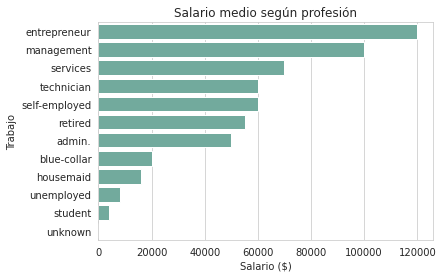

In [ ]:
df1 = df.sort_values(['salary'], ascending = False).reset_index(drop = True)

sns.barplot(x = "salary", y = "job", data = df1, 
            ci = None, color = '#69b3a2')

plt.title('Salario medio según profesión')
plt.xlabel('Salario ($)')
plt.ylabel('Trabajo')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


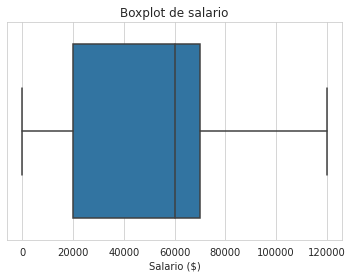

In [ ]:
# Boxplot de salario:

sns.boxplot(df.salary)
plt.title('Boxplot de salario')
plt.ylabel('')
plt.xlabel('Salario ($)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


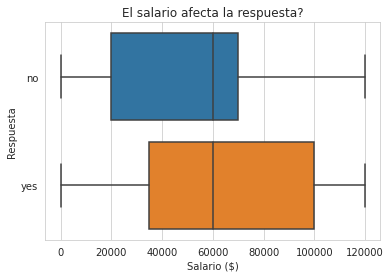

In [ ]:
# Boxplot de respuesta vs. salario:

sns.boxplot(df.salary, df.response)
plt.title('El salario afecta la respuesta?')
plt.ylabel('Respuesta')
plt.xlabel('Salario ($)')
plt.show()

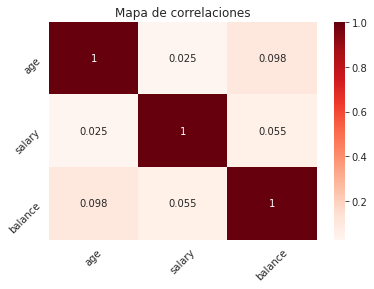

In [ ]:
# Primero creamos una matriz con las correlaciones entre variables de interés
correlacion = df[['age', 'salary', 'balance']].corr()

# Hacemos gráfico:
sns.heatmap(correlacion, annot = True, cmap = 'Reds')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Mapa de correlaciones')
plt.show()

Y eso es todo! Gracias por la buena onda en la clase de hoy :)